## Problem 1.1
Compute the surface size distribution from the field data (pebble count). 

**a)** Plot the probability density function (PDF) and cumulative distribution function (CDF), using either psi (ψ = log2(D)) units (0.5 increments) on a linear scale or diameter units (D [mm]) on a logarithmic scale. 

**b)** Compute the percentiles D16, D25, D50, D75, D84, D95. 

**c)** Compute the geometric mean (Dg) and geometric standard deviation (σg), using the general moment method.

Part a: PDF and CDF Plot


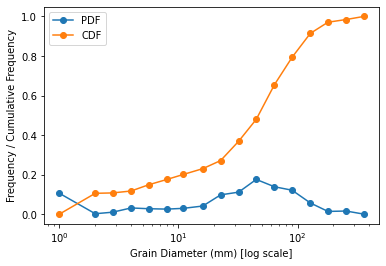

Part b: Percentiles
D16 = 6.55 mm
D25 = 18.95 mm
D50 = 46.83 mm
D75 = 80.81 mm
D84 = 103.02 mm
D95 = 158.69 mm

Part c: Geometric Mean and Std Deviation
Dg = 31.10 mm
σg = 4.24


,psi,D,PDF,CDF,psi_bar
16,8.49,360.0,0.000000,1.000000,NaN
15,8.00,256.0,0.015595,0.984405,8.245
14,7.49,180.0,0.013645,0.970760,7.745
13,7.00,128.0,0.056530,0.914230,7.245
12,6.49,90.0,0.120858,0.793372,6.745
11,6.00,64.0,0.138402,0.654971,6.245
10,5.49,45.0,0.175439,0.479532,5.745
9,5.00,32.0,0.111111,0.368421,5.245
8,4.50,22.6,0.097466,0.270955,4.750
7,4.00,16.0,0.040936,0.230019,4.250


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- 1. Define the data  ----
csv_input = r"C:\ATD\HW3\HW3.xlsx"

D = pd.read_excel(csv_input, sheet_name='Problem 1', usecols='A').values.flatten()
counts = pd.read_excel(csv_input, sheet_name='Problem 1', usecols='B').values.flatten()

# Total number of pebbles
total_count = np.sum(counts)

# ---- 2. Compute PDF and CDF  ----
pdf = counts / total_count
cdf = np.concatenate(([0], np.cumsum(pdf)[:-1]))

# ---- 3. Compute percentiles (D16, D25, D50, D75, D84, D95) using psi ----
percentile_levels = [0.16, 0.25, 0.50, 0.75, 0.84, 0.95]

# Convert grain sizes to psi scale: psi = log2(D)
psi_vals = np.log2(D)
#round to 2 decimal places
psi_vals = np.round(psi_vals, 2)
# Interpolate in psi space using the cumulative distribution function
psi_percentiles = [np.interp(p, cdf, psi_vals) for p in percentile_levels]
# Convert the psi-percentiles back to D using D = 2^(psi)
percentile_diams = [2**psi for psi in psi_percentiles]

D16, D25, D50, D75, D84, D95 = percentile_diams

# ---- 4. Compute geometric mean (Dg) and geometric standard deviation (σg) using psi ----
# Calculate psi mean as the current psi value averaged wuth the previous psi value
pdf_df = pd.DataFrame({'psi': psi_vals, 'D': D, 'PDF': pdf, 'CDF': cdf})
pdf_df = pdf_df.sort_values(by='psi', ascending=False)
pdf_df['psi_bar'] = pdf_df['psi'].rolling(window=2).mean()
psi_mean = np.sum(pdf_df['PDF'] * pdf_df['psi_bar']) 
Dg = 2 ** psi_mean
# Weighted standard deviation in psi space
sigma_psi = np.sqrt(np.sum(pdf_df['PDF'] * (pdf_df['psi'] - psi_mean)**2))
sigma_g = 2 ** sigma_psi

# ---- 5. Plot PDF and CDF  ----
print("Part a: PDF and CDF Plot")
fig, ax = plt.subplots()
ax.plot(D, pdf, 'o-', label='PDF')
ax.plot(D, cdf, 'o-', label='CDF')
ax.set_xscale('log')
ax.set_xlabel('Grain Diameter (mm) [log scale]')
ax.set_ylabel('Frequency / Cumulative Frequency')
ax.legend()
plt.show()

# Print computed statistics
print("Part b: Percentiles")
print(f"D16 = {D16:.2f} mm")
print(f"D25 = {D25:.2f} mm")
print(f"D50 = {D50:.2f} mm")
print(f"D75 = {D75:.2f} mm")
print(f"D84 = {D84:.2f} mm")
print(f"D95 = {D95:.2f} mm")

print("\nPart c: Geometric Mean and Std Deviation")
print(f"Dg = {Dg:.2f} mm")
print(f"σg = {sigma_g:.2f}")

display(pdf_df)


## Problem 1.2

**a)** For each pebble count, create plots comparing the cumulative distribution functions (CDFs) for each form of the distribution: GbN, AbN, and AbW.

**b)** Construct a table summarizing the following metrics for each distribution form (GbN, AbN, AbW)

,D,GbN PDF,GbN CDF
0,1.0,0.105263,0.000000
1,2.0,0.001949,0.105263
2,2.8,0.009747,0.107212
3,4.0,0.031189,0.116959
4,5.6,0.027290,0.148148
5,8.0,0.025341,0.175439
6,11.0,0.029240,0.200780
7,16.0,0.040936,0.230019
8,22.6,0.097466,0.270955
9,32.0,0.111111,0.368421


C:\Users\alextd\AppData\Local\Temp\7\ipykernel_42008\1973227188.py:103: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(results_df.style.hide_index())


Statistic,GbN,AbN,AbW
D16,6.538223,71.297115,45.881497
D25,18.937761,90.491515,55.783003
D50,46.887677,135.476806,90.668852
D75,80.880277,237.144380,137.489141
D84,103.099923,283.555670,169.001729
D95,158.817303,334.123829,292.453870
Dg,25.682487,113.586430,72.560132
σg,4.075866,1.904052,2.128240


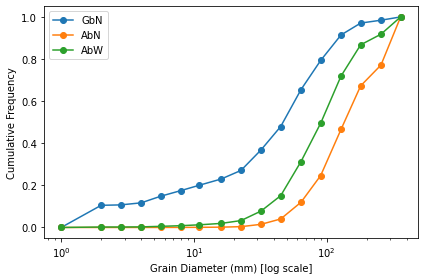

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1. Original data (Grid-by-Number: GbN) ----
csv_input = r"C:\ATD\HW3\HW3.xlsx"

D = pd.read_excel(csv_input, sheet_name='Problem 1', usecols='A').values.flatten()
counts = pd.read_excel(csv_input, sheet_name='Problem 1', usecols='B').values.flatten()

total_count = np.sum(counts)

# Grid-by-number PDF and CDF
GbN_pdf = counts / total_count
GbN_cdf = np.concatenate(([0], np.cumsum(pdf)[:-1]))

df = pd.DataFrame({'D': D, 'GbN PDF': GbN_pdf, 'GbN CDF': GbN_cdf})
display(df)

# ---- 2. Define conversion functions ----
def convert_distribution(pdf, D, exponent):
    """
    Convert a given distribution pdf to a new distribution by
    multiplying pdf[i] by D[i]^exponent, then re-normalizing.
    """
    factor = D**exponent
    unscaled = pdf * factor
    new_pdf = unscaled / unscaled.sum()
    new_cdf = np.concatenate(([0], np.cumsum(new_pdf)[:-1]))
    return new_pdf, new_cdf

# Kellerhals & Bray conversion exponents for:
#   GbN -> AbN is D^2
#   GbN -> AbW is D^1
AbN_pdf, AbN_cdf = convert_distribution(GbN_pdf, D, exponent=2)
AbW_pdf, AbW_cdf = convert_distribution(GbN_pdf, D, exponent=1)

# ---- 3. Compute percentiles and geometric stats for each distribution ----
def compute_percentiles(D, cdf, pvals=[0.16, 0.25, 0.50, 0.75, 0.84, 0.95]):
    """
    Return an array of D-values at given cumulative percentages.
    This function first converts D to ψ-scale, interpolates the ψ values
    at the specified percentiles, then converts back to D via D = 2^(ψ).
    """
    # Convert grain sizes to ψ scale: ψ = log2(D)
    psi_vals = np.log2(D)
    # Interpolate in ψ-space
    psi_percentiles = [np.interp(p, cdf, psi_vals) for p in pvals]
    # Convert back to D
    D_percentiles = [2**psi for psi in psi_percentiles]
    return D_percentiles

def compute_geo_stats(D, pdf):
    """
    Compute the geometric mean Dg and geometric standard deviation σg
    using the ψ formulation.
    
    In ψ space:
      ψ = log₂(D)
      ψ_mean = Σ (pᵢ · ψᵢ)
      Dg = 2^(ψ_mean)
      σψ = √[Σ (pᵢ · (ψᵢ − ψ_mean)²)]
      σg = 2^(σψ)
    """
    # Convert to ψ scale
    psi_vals = np.log2(D)
    pdf_df = pd.DataFrame({'psi': psi_vals, 'D': D, 'pdf': pdf})
    pdf_df = pdf_df.sort_values(by='psi', ascending=False)
    pdf_df['psi_bar'] = pdf_df['psi'].rolling(window=2).mean()
    # Weighted mean in ψ space
    psi_mean = np.sum(pdf * psi_vals)
    Dg = 2 ** psi_mean
    # Weighted standard deviation in ψ space
    sigma_psi = np.sqrt(np.sum(pdf_df['pdf'] * (pdf_df['psi_bar'] - psi_mean)**2))
    sigma_g = 2 ** sigma_psi
    return Dg, sigma_g

# Percentile levels (as fractions; e.g., 0.16 for 16%)
p_levels = [0.16, 0.25, 0.50, 0.75, 0.84, 0.95]

GbN_perc = compute_percentiles(D, GbN_cdf, p_levels)
AbN_perc = compute_percentiles(D, AbN_cdf, p_levels)
AbW_perc = compute_percentiles(D, AbW_cdf, p_levels)

GbN_Dg, GbN_sg = compute_geo_stats(D, GbN_pdf)
AbN_Dg, AbN_sg = compute_geo_stats(D, AbN_pdf)
AbW_Dg, AbW_sg = compute_geo_stats(D, AbW_pdf)

# ---- 4. Create a table of results ----
stat_names = ["D16", "D25", "D50", "D75", "D84", "D95", "Dg", "σg"]

GbN_stats = GbN_perc + [GbN_Dg, GbN_sg]
AbN_stats = AbN_perc + [AbN_Dg, AbN_sg]
AbW_stats = AbW_perc + [AbW_Dg, AbW_sg]

results_df = pd.DataFrame({
    "Statistic": stat_names,
    "GbN": GbN_stats,
    "AbN": AbN_stats,
    "AbW": AbW_stats
})
# Display the results without an index column
display(results_df.style.hide_index())

# ---- 5. Plot the CDFs on one figure ----
plt.figure()
plt.plot(D, GbN_cdf, 'o-', label='GbN')
plt.plot(D, AbN_cdf, 'o-', label='AbN')
plt.plot(D, AbW_cdf, 'o-', label='AbW')
plt.xscale('log')
plt.xlabel('Grain Diameter (mm) [log scale]')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.tight_layout()
plt.show()


## Problem 2

**a)** What is the mean Cory shape factor (CSF) for each rock type?

The Corey Shape Factor is defined as:

$$
CSF = \frac{c}{\sqrt{a b}}
$$

where:

- $a$ is the longest axis (length)  
- $b$ is the intermediate axis (width)  
- $c$ is the shortest axis (thickness)  

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------
# Constants and Parameters
# ---------------------
# Physical constants
viscosity = 1.31e-6   # [m^2/s] (kinematic viscosity, water at 10°C)
rho_s = 2650        # [kg/m^3] (particle/rock density)
rho = 1000          # [kg/m^3] (water density)
g = 9.81            # [m/s^2] (gravitational acceleration)

# River parameters (used in Model B for travel distance)
U = 0.50            # [m/s] (mean velocity)
depth = 3.0         # [m] (mean depth)

# Power scale mapping for rock types
power_scale = {'Schist': 4.0, 'Quartzite': 4.0, 'Slate': 2.0}

# ---------------------
# Read and Prepare Data
# ---------------------
excel_path = r"C:\ATD\HW3\HW3.xlsx"
df = pd.read_excel(excel_path, sheet_name="Problem 2", usecols="A:E")
# Drop rows missing key columns and reset index
df = df.dropna(subset=["Rock Type", "A Axis", "B Axis", "C Axis"]).reset_index(drop=True)

# Compute common geometric parameters
def compute_geometric_params(row):
    A, B, C = row["A Axis"], row["B Axis"], row["C Axis"]
    A, B, C = A / 1000, B / 1000, C / 1000  # Convert mm to m
    Dn = (A * B * C)**(1/3)           # Characteristic grain size
    CSF = C / np.sqrt(A * B)          # Corey Shape Factor
    rock = row["Rock Type"].strip()   # Strip whitespace
    P = power_scale.get(rock, 4.0)      # Get power scale with default
    return pd.Series({'Dn': Dn, 'CSF': CSF, 'P': P})

df[['Dn', 'CSF', 'P']] = df.apply(compute_geometric_params, axis=1)

# ---------------------
# Mean Corey Shape Factor Calculation
# ---------------------
mean_csf = df.groupby('Rock Type')['CSF'].mean()
print("Mean Corey Shape Factor (CSF) for each rock type:\n")
print(mean_csf)


Mean Corey Shape Factor (CSF) for each rock type:

Rock Type
Quartzite    0.802335
Schist       0.203742
Slate        0.805982
Name: CSF, dtype: float64


**b)** Plot settling velocity against characteristic grain size (Dn), with all three rock types on the same 
log-log graph. Use the Dietrich (1982) formulation and the assumptions provided below.


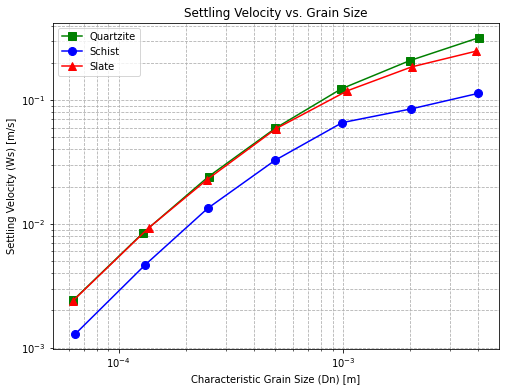

In [32]:
def compute_R1(logDstar):
    return (-3.76715 +
            1.92944 * logDstar -
            0.09815 * (logDstar ** 2) -
            0.00575 * (logDstar ** 3) +
            0.00056 * (logDstar ** 4))

def compute_R2(logDstar, CSF):
    # Original: log(1 - (1 - CSF^0.85)) simplifies to log(CSF^0.85)
    return (np.log10(1 - ((1 - CSF)/0.85)) - (1 - CSF)**2.3 * np.tanh(logDstar - 4.6) + 
           0.3 * (0.5 - CSF) * (1 - CSF)**2.0 * (logDstar - 4.6))

def compute_R3(logDstar, CSF, P):
    exponent = 1 + (3.5 - P) / 2.5
    return (0.65 - (CSF / 2.83) * np.tanh(logDstar - 4.6)) ** exponent

def compute_Ws(row):
    R1 = compute_R1(row['logDstar'])
    R2 = compute_R2(row['logDstar'], row['CSF'])
    R3 = compute_R3(row['logDstar'], row['CSF'], row['P'])
    W_star = R3 * 10**(R1 + R2)
    # Dimensional settling velocity
    return ((W_star * (((rho_s - rho) / rho) * g * viscosity))**(1/3))

# Compute dimensionless grain size Dstar and its log (base 10)
# Note: Both formulations use the same Dstar definition.
df['Dstar'] = ((rho_s - rho) * g * (df['Dn']**3)) / (rho * viscosity**2)
df['logDstar'] = np.log10(df['Dstar'])

# Compute settling velocity for Part B
df['Ws'] = df.apply(compute_Ws, axis=1)

# ---------------------
# Plotting
# ---------------------
# Define consistent markers and colors for all rock types
markers = {'Schist': 'o', 'Quartzite': 's', 'Slate': '^'}
colors = {'Schist': 'blue', 'Quartzite': 'green', 'Slate': 'red'}

plt.figure(figsize=(8, 6))
for rock, group in df.groupby('Rock Type'):
    plt.loglog(group['Dn'], group['Ws'],
               marker=markers.get(rock, 'o'),
               linestyle='-',
               color=colors.get(rock, 'black'),
               label=rock,
               markersize=8)
plt.xlabel('Characteristic Grain Size (Dn) [m]')
plt.ylabel('Settling Velocity (Ws) [m/s]')
plt.title('Settling Velocity vs. Grain Size')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()





**c)** Plot the maximum travel distance of each of the particles (ignoring the effects of turbulence) 
before settling to the bed against grain size, with all three rock types on the same log-log graph. 

Make the following assumptions:
- the river has a mean velocity of $0.50$ $ m/sec$ and a mean depth of $3 m$;
- the water is 10 degrees $C$ (i.e., $ν = 1.31*10^{-6}$ $m^2/s$ ); 
- the schist and quartzite grains have a powers scale value of 4.0;
- the slate grains have a powers scale value of 2.0;
- all particles have a density of $2,650$ $kg/m^3$

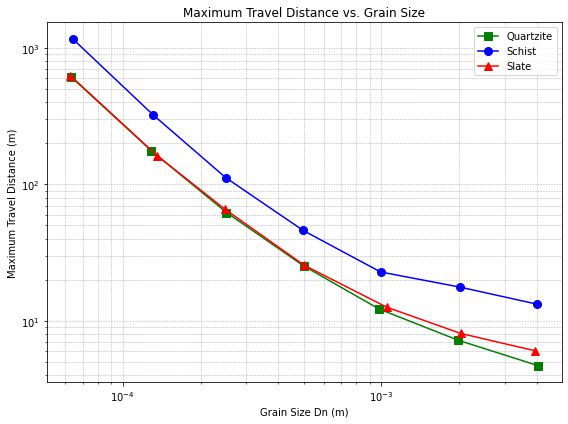

In [33]:
df['Travel_Distance'] = (U * depth) / df['Ws']

# ---------------------
# Plotting
# ---------------------
plt.figure(figsize=(8, 6))
for rock, group in df.groupby('Rock Type'):
    plt.loglog(group['Dn'], group['Travel_Distance'],
               marker=markers.get(rock, 'o'),
               linestyle='-',
               color=colors.get(rock, 'black'),
               label=rock,
               markersize=8)
plt.xlabel("Grain Size Dn (m)")
plt.ylabel("Maximum Travel Distance (m)")
plt.title("Maximum Travel Distance vs. Grain Size")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

## Problem 2d

**d)** Briefly discuss the relative effect of differences in CSF and powers scale on settling velocity.

**CSF**

CSF appears in the correction terms (R2 and R3) through both logarithmic and hyperbolic tangent functions. A higher CSF (closer to that of a smooth, spherical particle) reduces the magnitude of these corrections, resulting in a higher calculated settling velocity. In contrast, a lower CSF, which represents a more irregular or rougher shape, increases the corrections (through factors like (1−CSF)), thereby reducing the settling velocity.

**Powers Scale**

The powers scale parameter affects the exponent (or a multiplying factor) in the R3 term. A higher powers scale value increases the sensitivity of the settling velocity to the shape corrections, which reduces the computed dimensionless velocity (and the settling velocity) more strongly. Conversely, a lower powers scale value results in a smaller reduction, leading to a higher settling velocity.

## Problem 3

For the stations located at 924, 2813, and 2822, please determine the D16, D50, D84, D90, Dg (geometric mean), σ(geometric standard deviation), and Fs (fraction of sand < 2mm).

In [ ]:
import pandas as pd
import numpy as np

# Path to the CSV file
csv_path = r"C:\ATD\HW3\prob3_2 data.csv"

# Read the data
df = pd.read_csv(csv_path)

# Stations of interest
stations_of_interest = [924, 2813, 2822]

def compute_percentiles_psi(x_vals, y_vals, percentile_targets):
    """
    Compute percentiles using the ψ-scale interpolation.
    :param x_vals: array of grain sizes in mm
    :param y_vals: array of cumulative percent finer (0 to 100)
    :param percentile_targets: list of target percentiles (in %)
    :return: dictionary of computed diameters (mm), PDF, psi values, and psi-based CDF.
    """
    # Convert cumulative percentages to fractions (0 to 1)
    y_frac = y_vals / 100.0
    # Prepend 0 to represent 0% (consistent with the template method)
    cum_frac = np.concatenate(([0], y_frac))
    # Compute PDF as the differences between successive cumulative fractions
    pdf = np.diff(cum_frac)
    
    # Convert grain sizes to ψ scale
    psi_vals = np.log2(x_vals)
    # Compute a CDF for ψ by prepending 0 and using the PDF
    psi_cdf = np.concatenate(([0], np.cumsum(pdf)[:-1]))
    
    # Interpolate to get the ψ value corresponding to each target percentile
    psi_percentiles = {p: np.interp(p / 100.0, psi_cdf, psi_vals) for p in percentile_targets}
    # Convert back from ψ to grain size (mm): D = 2^(ψ)
    diameters = {p: 2 ** psi for p, psi in psi_percentiles.items()}
    
    return diameters, pdf, psi_vals, psi_cdf

results = []

for stn in stations_of_interest:
    # Extract and sort the station's data by cumulative percent (Y)
    stn_data = df[df["Station"] == stn].copy()
    stn_data.sort_values(by="Y", inplace=True)
    x_vals = stn_data["X"].values  # grain sizes in mm
    y_vals = stn_data["Y"].values  # cumulative percent finer (0 to 100)
    
    # Define the target percentiles (in %)
    target_percents = [16, 50, 84, 90]
    percentiles, pdf, psi_vals, psi_cdf = compute_percentiles_psi(x_vals, y_vals, target_percents)
    D16 = percentiles[16]
    D50 = percentiles[50]
    D84 = percentiles[84]
    D90 = percentiles[90]
    
    # Compute geometric mean (Dg) and geometric standard deviation (σg) in ψ space.
    pdf_df = pd.DataFrame({'psi': psi_vals, 'pdf': pdf})
    pdf_df['psi_bar'] = pdf_df['psi'].rolling(window=2).mean()
    psi_mean = np.sum(pdf_df['pdf'] * pdf_df['psi_bar'])
    Dg = 2 ** psi_mean
    sigma_psi = np.sqrt(np.sum(pdf_df['pdf'] * (pdf_df['psi_bar'] - psi_mean) ** 2))
    sigma_g = 2 ** sigma_psi
    
    # Compute fraction finer than 2 mm by interpolating in the original grain size space.
    stn_data.sort_values(by="X", inplace=True)
    x_sorted = stn_data["X"].values
    y_sorted = stn_data["Y"].values
    Fs = np.interp(2, x_sorted, y_sorted)  # Fs in percent
    
    results.append({
        "Station": stn,
        "D16": D16,
        "D50": D50,
        "D84": D84,
        "D90": D90,
        "Dg": Dg,
        "σg": sigma_g,
        "Fs(<2mm)": Fs
    })

# Print the results
for r in results:
    print(f"Station {r['Station']}:")
    print(f"  D16 = {r['D16']:.4f} mm")
    print(f"  D50 = {r['D50']:.4f} mm")
    print(f"  D84 = {r['D84']:.4f} mm")
    print(f"  D90 = {r['D90']:.4f} mm")
    print(f"  Dg  = {r['Dg']:.4f} mm")
    print(f"  σg  = {r['σg']:.4f}")
    print(f"  Fs(<2mm) = {r['Fs(<2mm)']:.2f}%\n")


Station 924:
  D16 = 29.0966 mm
  D50 = 70.9344 mm
  D84 = 134.7324 mm
  D90 = 154.2621 mm
  Dg  = 49.4555 mm
  σg  = 2.6002
  Fs(<2mm) = 2.02%

Station 2813:
  D16 = 0.7898 mm
  D50 = 7.7431 mm
  D84 = 15.2108 mm
  D90 = 16.0646 mm
  Dg  = 4.1164 mm
  σg  = 3.2760
  Fs(<2mm) = 26.63%

Station 2822:
  D16 = 0.3245 mm
  D50 = 0.5042 mm
  D84 = 1.1323 mm
  D90 = 1.7964 mm
  Dg  = 0.5946 mm
  σg  = 1.9892
  Fs(<2mm) = 92.71%

